In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv("Zoo.csv")

In [24]:
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [25]:
df.shape

(101, 18)

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [27]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [28]:
df.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


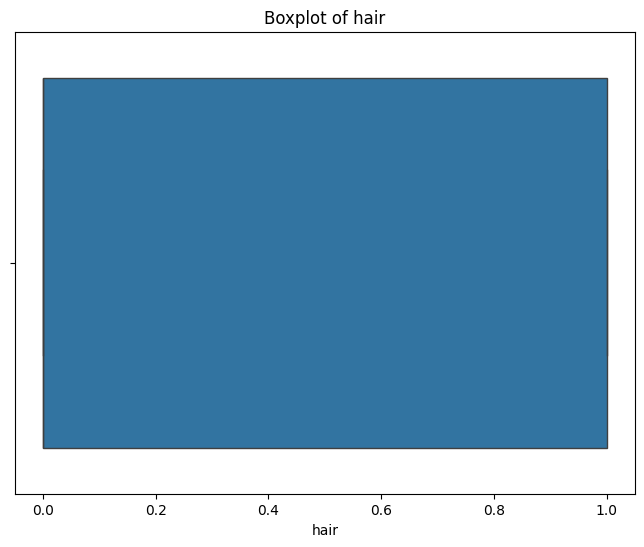

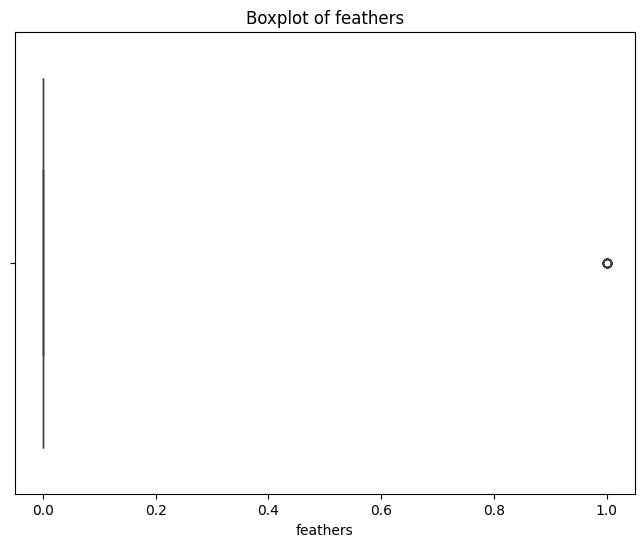

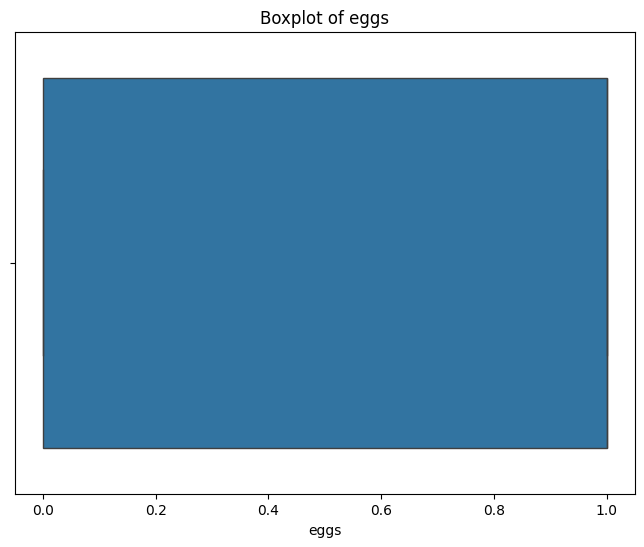

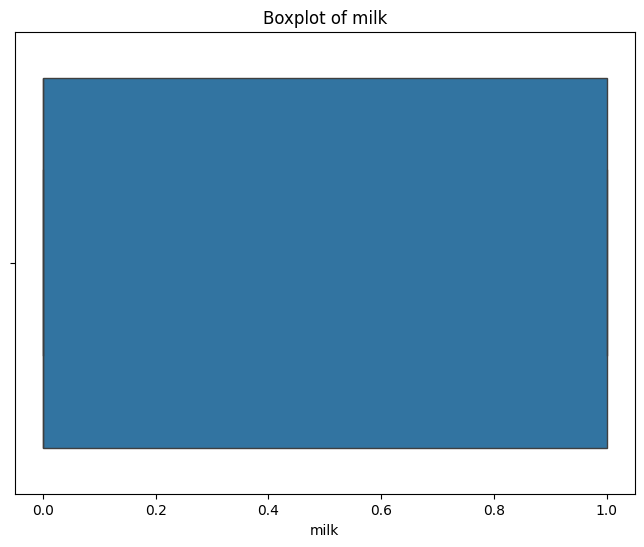

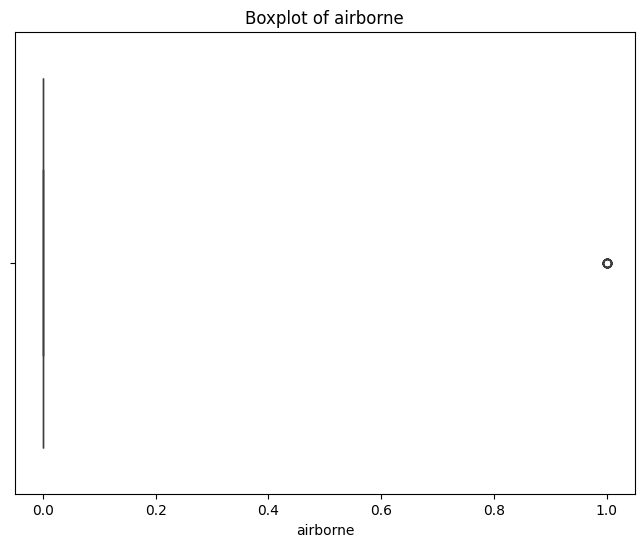

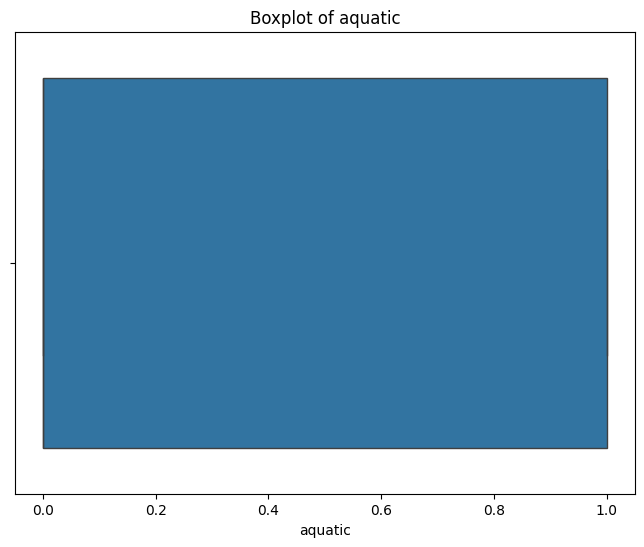

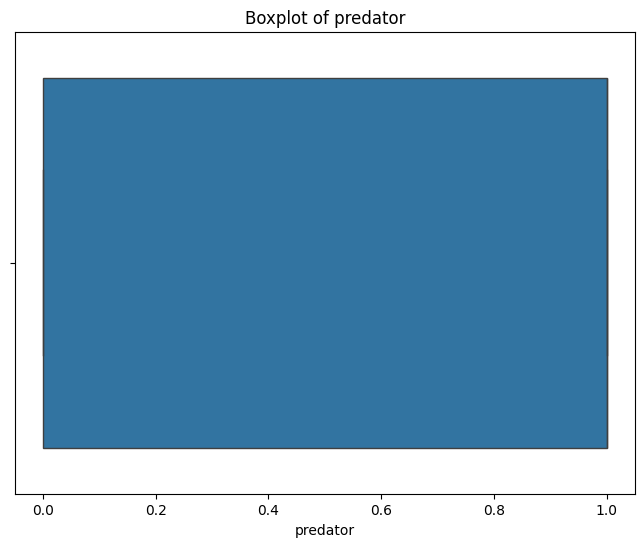

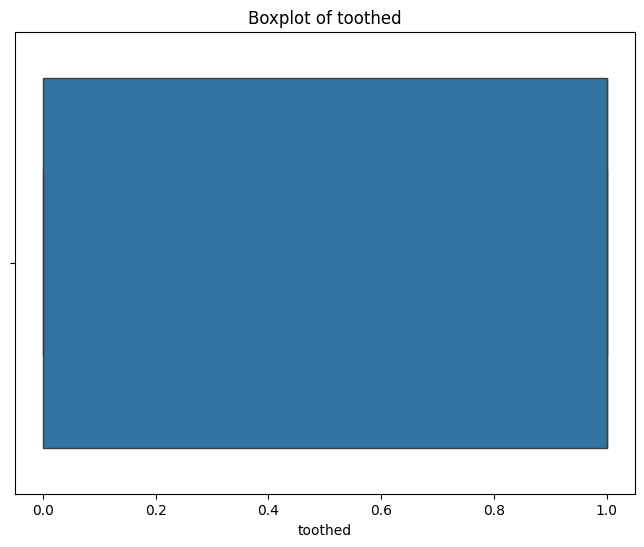

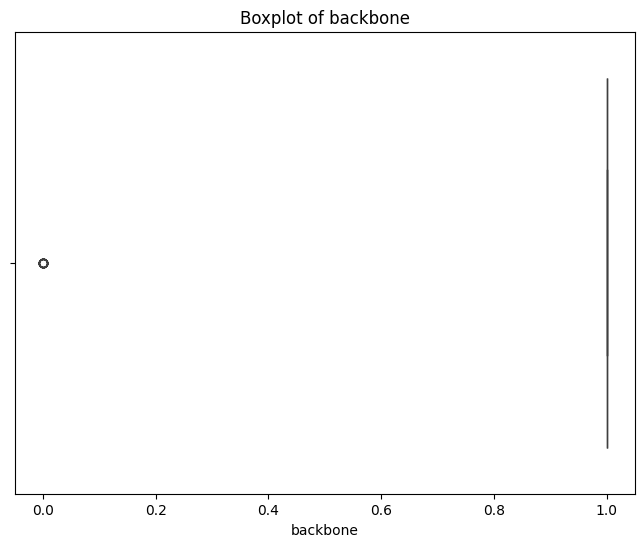

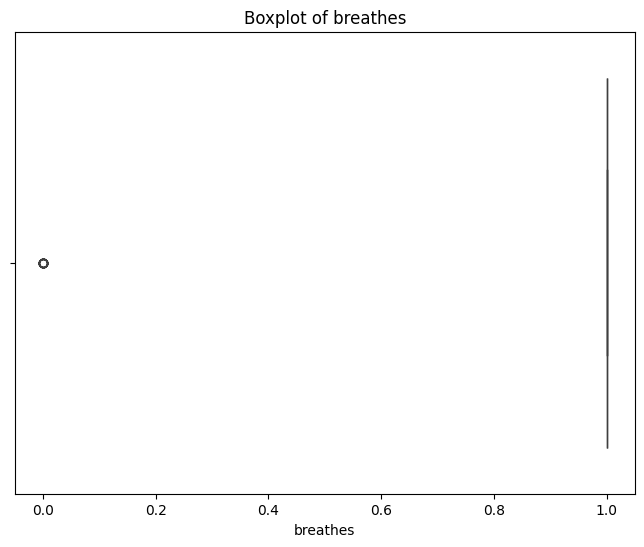

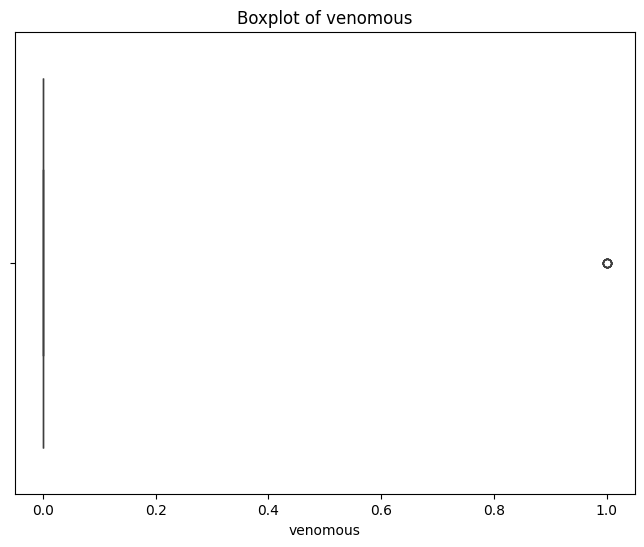

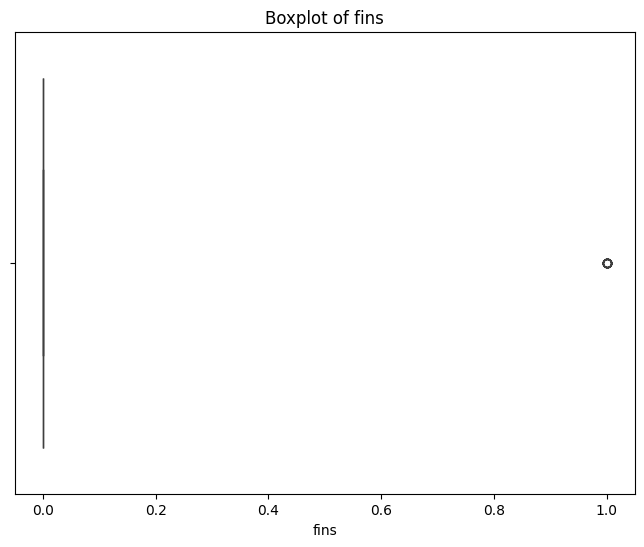

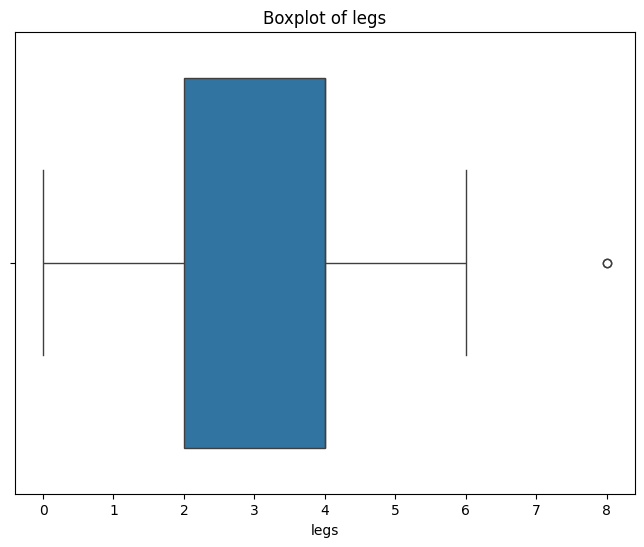

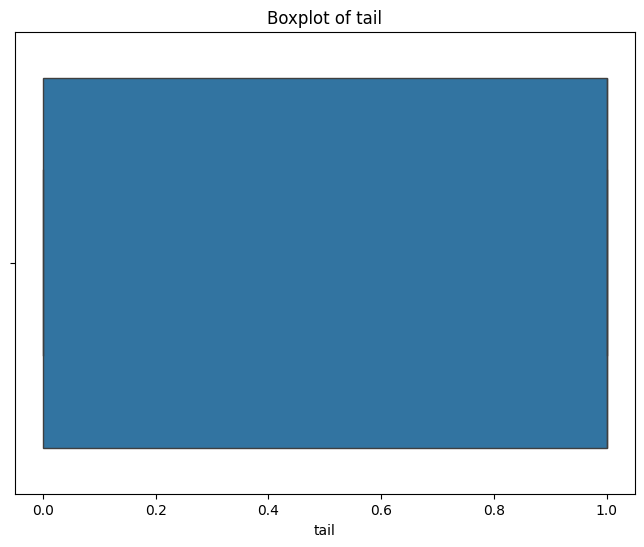

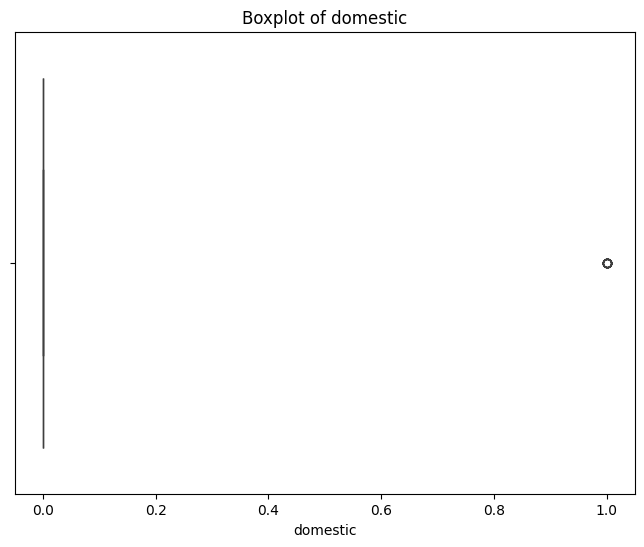

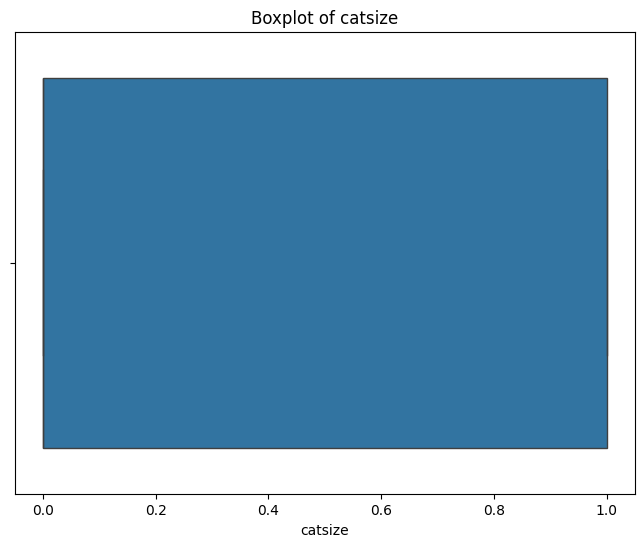

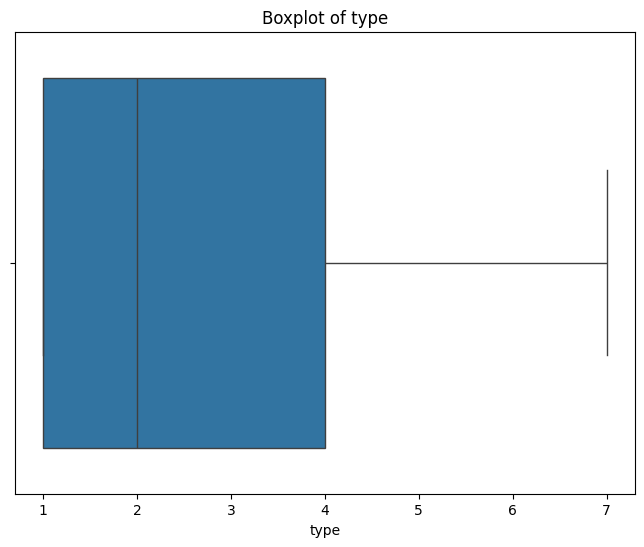

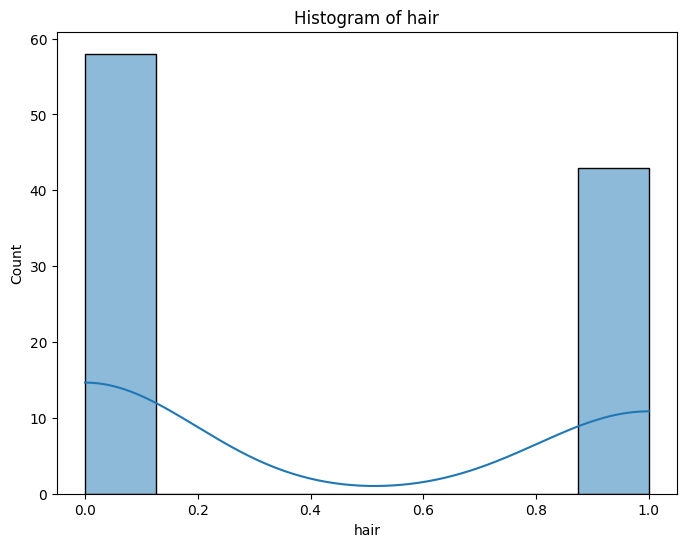

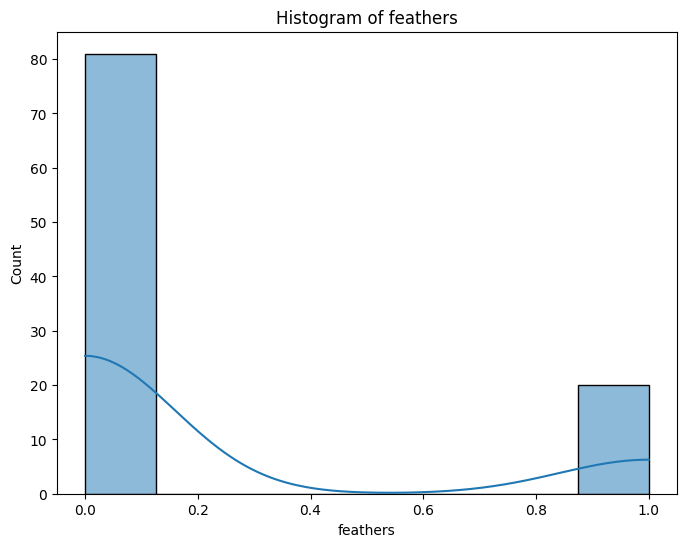

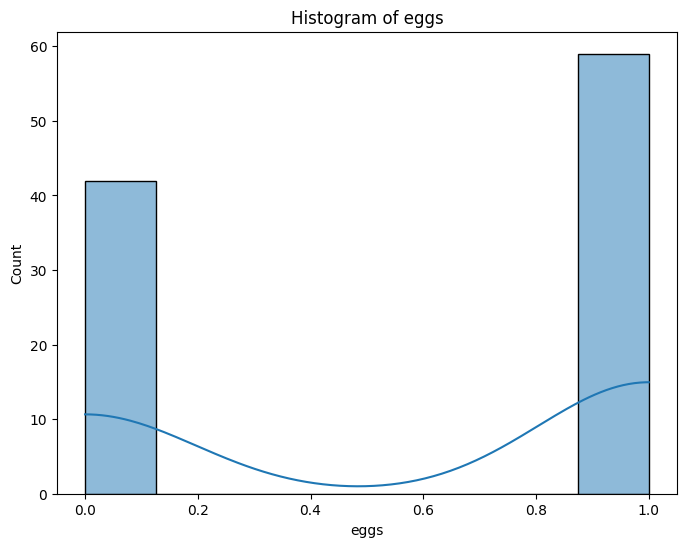

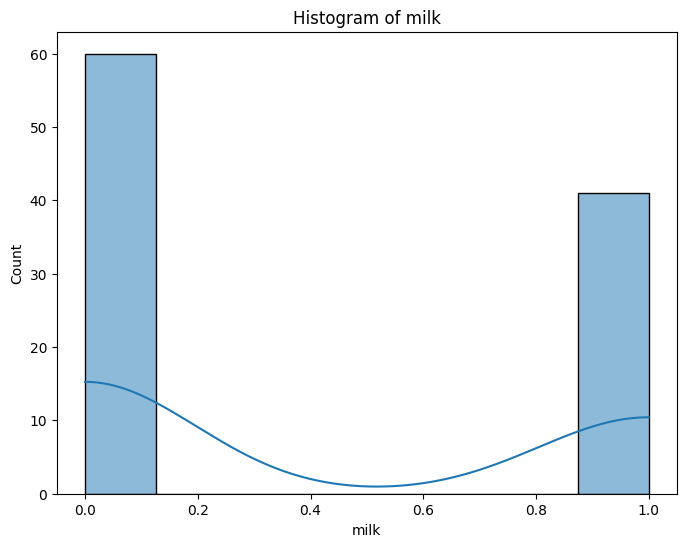

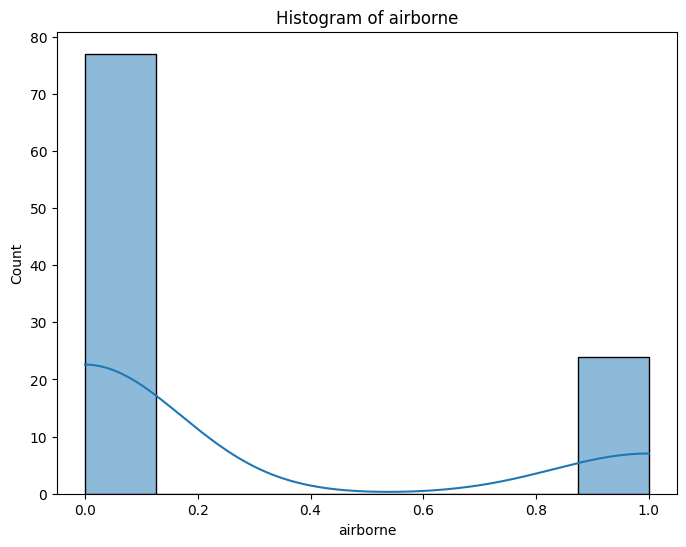

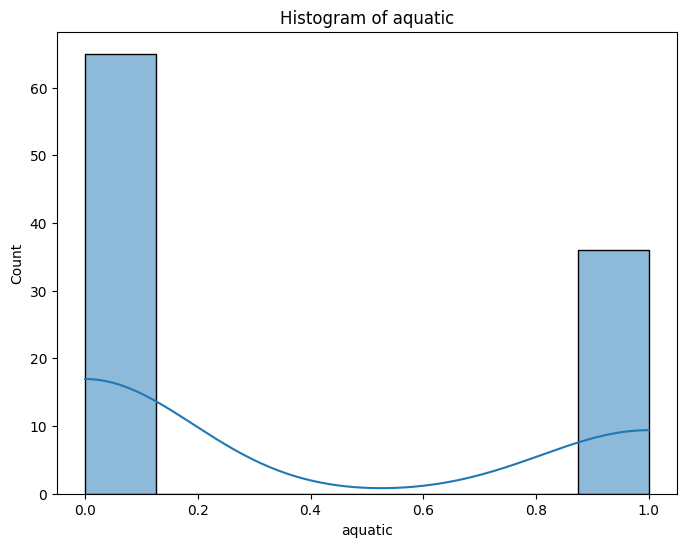

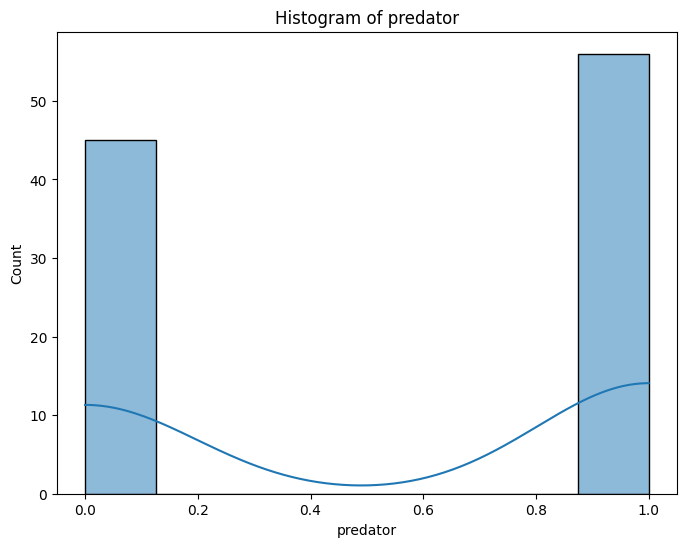

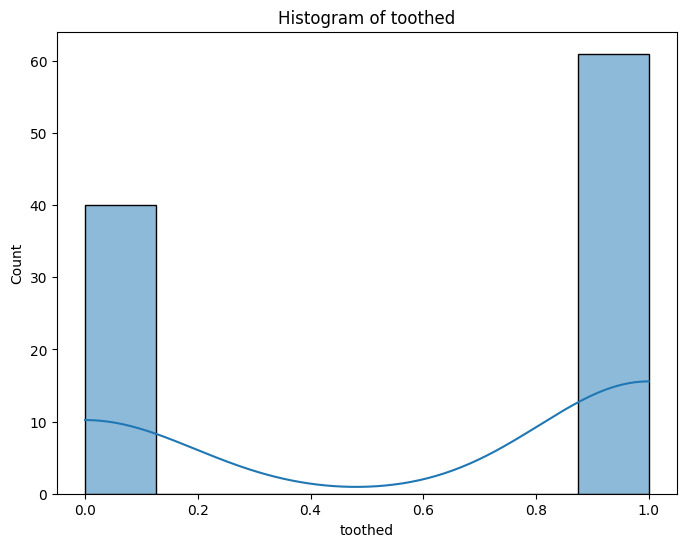

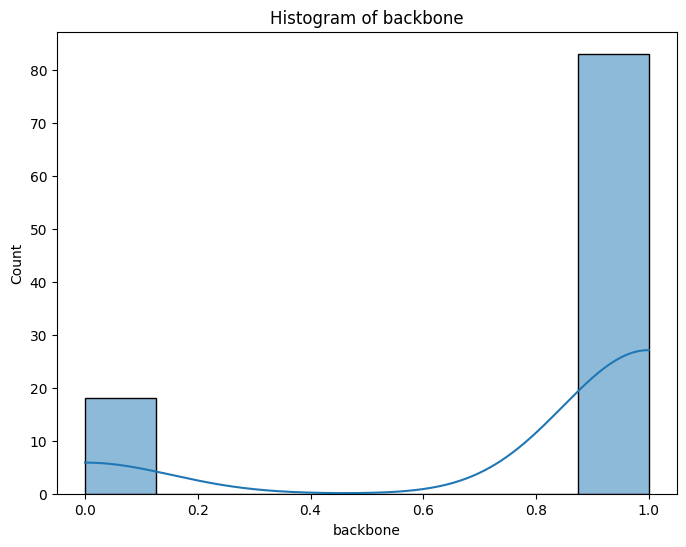

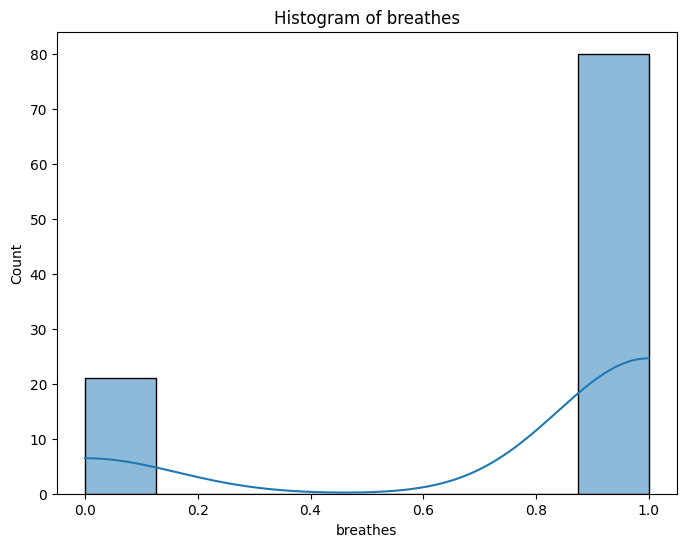

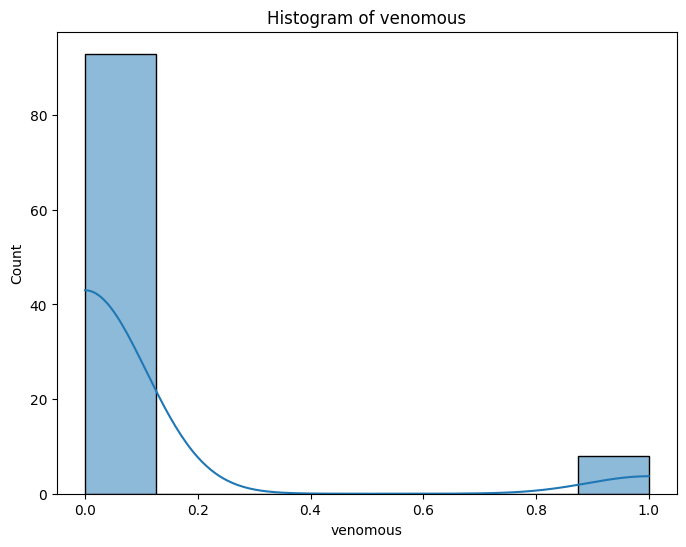

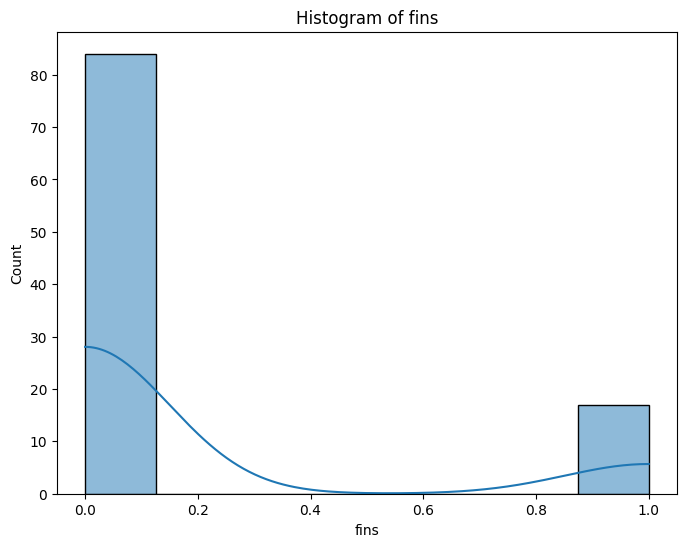

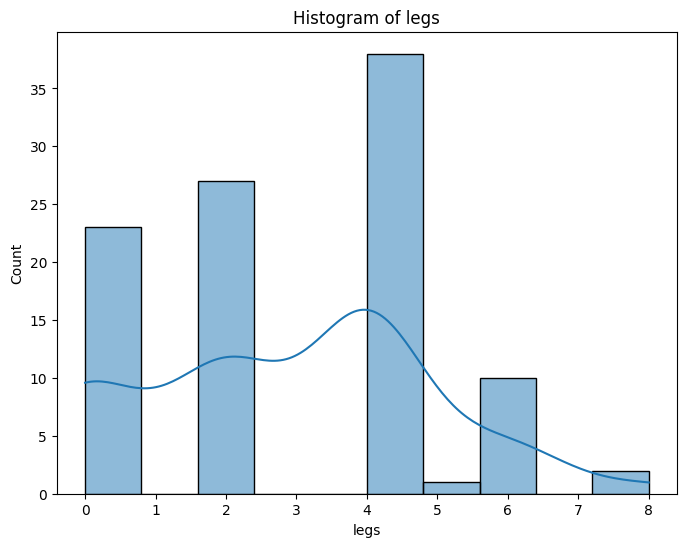

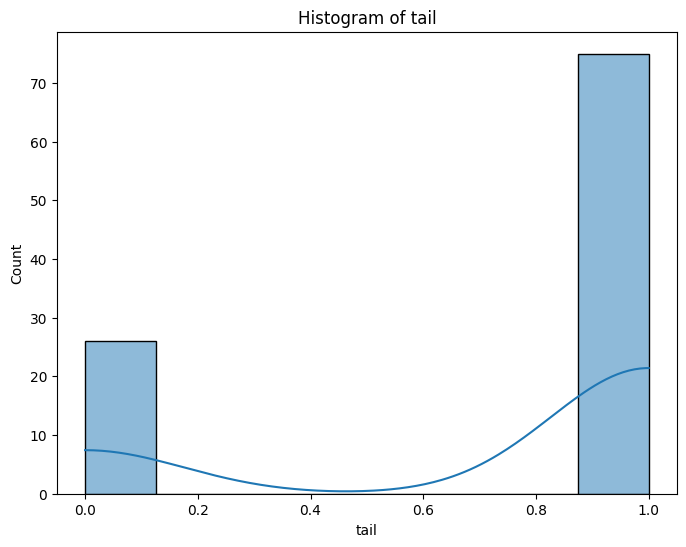

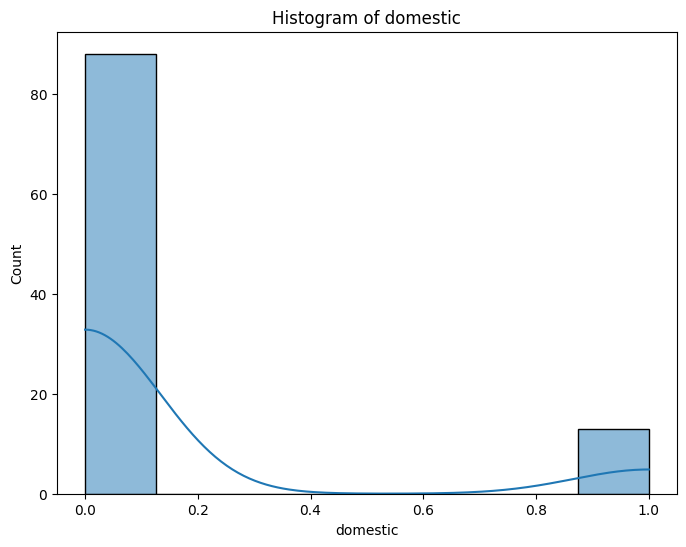

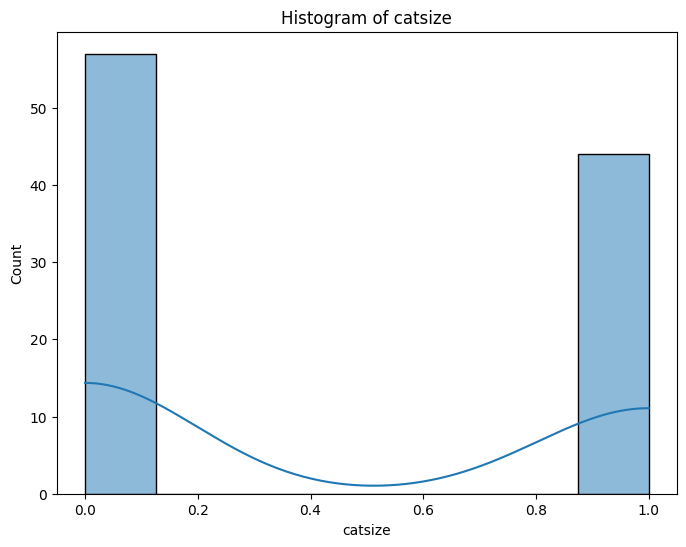

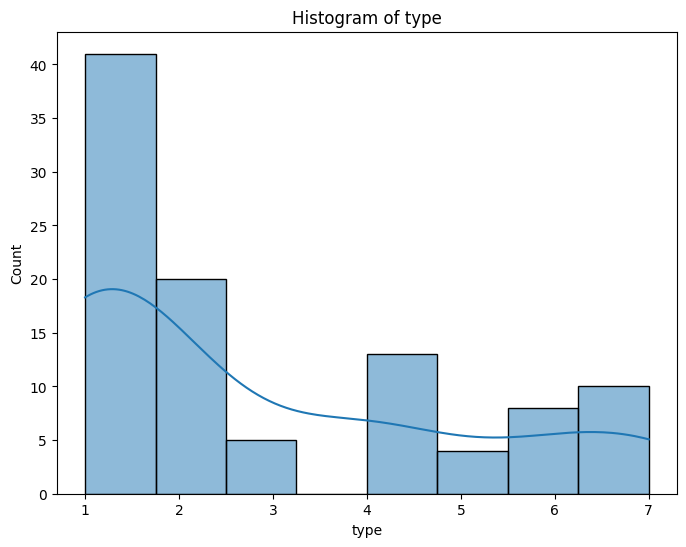

In [29]:
# Select only the integer columns
int_cols = df.select_dtypes(include=np.int64).columns

# Plot boxplots for each integer column
for col in int_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Plot histograms for each integer column
for col in int_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

In [30]:
missing_data = df.isnull().sum()
print("Missing data per column:")
print(missing_data)

Missing data per column:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [31]:
# Find outliers using IQR for integer columns
for col in int_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers[['animal name', col]])

Outliers in hair:
Empty DataFrame
Columns: [animal name, hair]
Index: []
Outliers in feathers:
    animal name  feathers
11      chicken         1
16         crow         1
20         dove         1
21         duck         1
23     flamingo         1
33         gull         1
37         hawk         1
41         kiwi         1
43         lark         1
56      ostrich         1
57     parakeet         1
58      penguin         1
59     pheasant         1
71         rhea         1
78      skimmer         1
79         skua         1
83      sparrow         1
87         swan         1
95      vulture         1
100        wren         1
Outliers in eggs:
Empty DataFrame
Columns: [animal name, eggs]
Index: []
Outliers in milk:
Empty DataFrame
Columns: [animal name, milk]
Index: []
Outliers in airborne:
    animal name  airborne
11      chicken         1
16         crow         1
20         dove         1
21         duck         1
23     flamingo         1
27     fruitbat         1
30       

In [32]:
# Remove outliers using IQR for integer columns
for col in int_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed.")

Outliers removed.


In [33]:
from sklearn.model_selection import train_test_split

# Assuming 'type' is the target variable
X = df.drop('type', axis=1)
y = df['type']

# Drop the 'animal name' column from features as it's not numerical
X = X.drop('animal name', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Dataset split into training and testing sets.
Shape of X_train: (16, 16)
Shape of X_test: (5, 16)
Shape of y_train: (16,)
Shape of y_test: (5,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with n_neighbors=5 (you can adjust this value)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

print("K-Nearest Neighbors model trained successfully.")

K-Nearest Neighbors model trained successfully.


We can use cross-validation to find a good value for *k*. We will iterate through a range of possible *k* values and calculate the accuracy for each using cross-validation.

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 274, in

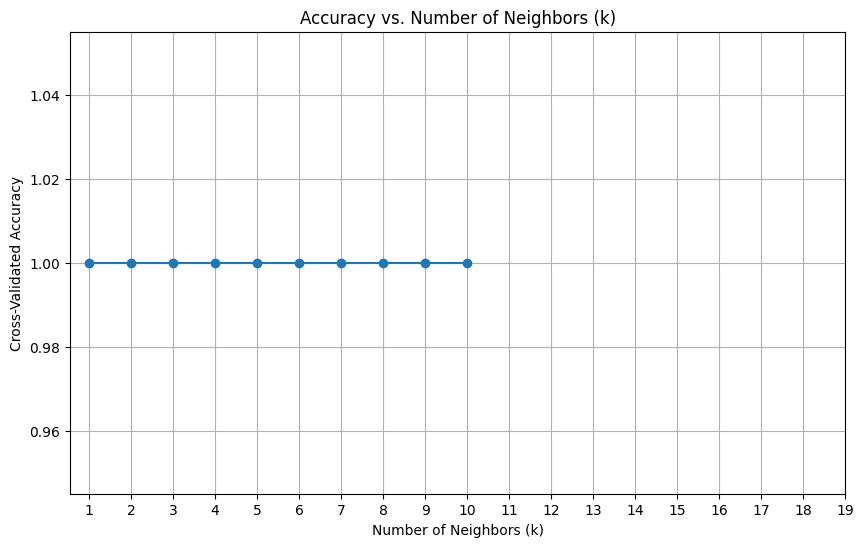

The optimal number of neighbors (k) is: 11


In [35]:
from sklearn.model_selection import cross_val_score

# Try different values of k
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy') # Reduced cv to 3
    cv_scores.append(scores.mean())

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors (k) is: {optimal_k}")

In [36]:
from sklearn.metrics import classification_report

# Recreate and train the KNN model with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set using the optimal model
y_pred_optimal = knn_optimal.predict(X_test)

# Evaluate the classifier performance
print("Classification Report with Optimal k:")
print(classification_report(y_test, y_pred_optimal))

Classification Report with Optimal k:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [37]:
print("Class distribution in training set:")
print(y_train.value_counts())

print("\nClass distribution in testing set:")
print(y_test.value_counts())

Class distribution in training set:
type
1    16
Name: count, dtype: int64

Class distribution in testing set:
type
1    5
Name: count, dtype: int64


First, I will use PCA to reduce the dimensionality of the data to 2 components.

In [38]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Now, I will train a KNN classifier on the PCA-transformed training data and visualize the decision boundaries.

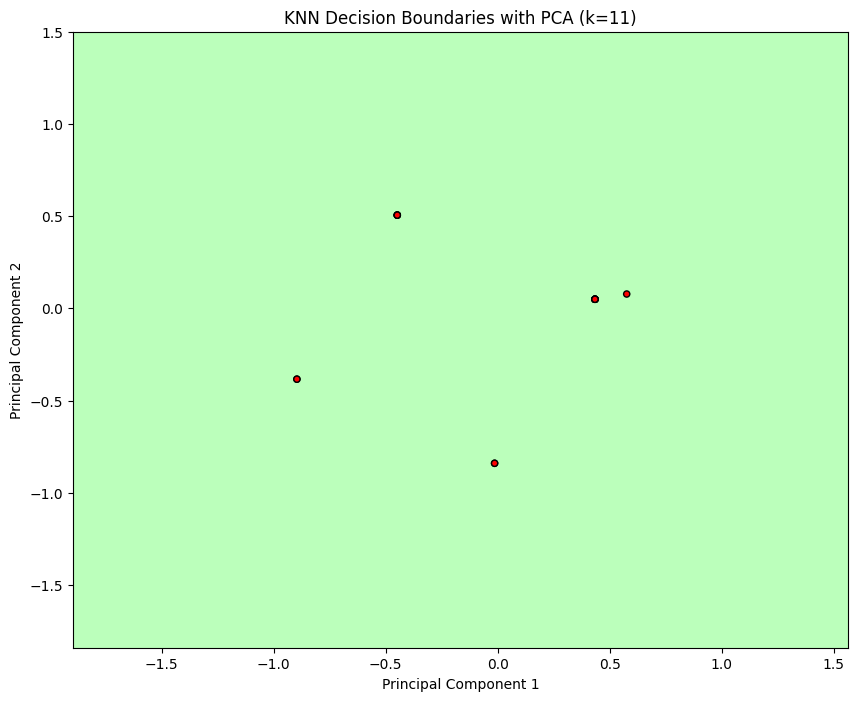

In [39]:
from matplotlib.colors import ListedColormap

# Create a KNN classifier with the optimal k on the PCA transformed data
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k)
knn_pca.fit(X_train_pca, y_train)

# Create a meshgrid of points to plot the decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a colormap for the classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFF77', '#77FFFF', '#FF77FF', '#7777FF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#0000FF'])

# Plot the decision boundaries and the training points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundaries with PCA (k=%d)" % optimal_k)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

What are the key hyperparameters in KNN?
A1. The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:

n_neighbors (K value):

Determines the number of nearest neighbors to consider for making predictions.

A smaller K makes the model more sensitive to noise, while a larger K smooths the decision boundary.

weights:

Defines how the influence of neighbors is weighted.

Options:

"uniform" – All neighbors have equal weight.

"distance" – Closer neighbors have more influence.

metric:

Specifies the distance metric used to measure similarity between data points (e.g., Euclidean, Manhattan).

algorithm:

Determines the method used to compute nearest neighbors.

Options: "auto", "ball_tree", "kd_tree", and "brute".

leaf_size:

Used when algorithm is "ball_tree" or "kd_tree"; affects the speed of the query and the memory used.

Q2. What distance metrics can be used in KNN?
A2. The commonly used distance metrics in KNN are:

Euclidean Distance:

The most common metric; calculates straight-line distance between two points.

Manhattan Distance (L1):

Measures distance as the sum of absolute differences between coordinates.

Minkowski Distance:

A generalized form of both Euclidean and Manhattan distances, controlled by a parameter p.

Chebyshev Distance:

Measures the greatest difference along any coordinate dimension.

Hamming Distance:

Used for categorical data; counts the number of positions with mismatched values.

Cosine Similarity (or Distance):

Measures the cosine of the angle between two vectors, useful for text or high-dimensional data.
